# **MODEL TRAINING**

## Step 1: Load the Cleaned Dataset

In [24]:
import pandas as pd
df = pd.read_csv("/content/cleaned_spacex_launches.csv")
print(df.shape)
df.head()

(824, 11)


,Flight No.,Date and time (UTC),"Version, booster[h]",Launch site,Payload[i],Payload mass,Orbit,Customer,Launch outcome,Booster landing,Landing_Success
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060‑15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[j],SSO,Various,Success,Success (LZ‑1),1.0
1,195,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,NaN
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076‑2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1),1.0
3,196,"Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...",NaN
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt,NaN


## Step 2: Handle Payload mass

In [19]:
df['Payload mass'] = pd.to_numeric(df['Payload mass'], errors='coerce')
df = df.dropna(subset=['Payload mass'])

## Step 3: Select features and target

In [20]:
features = ['Payload mass', 'Orbit', 'Version, booster[h]', 'Launch site']
target = 'Landing_Success'

## Step 4: One-hot encode categorical features

In [25]:
df = df.dropna(subset=[target])

X = pd.get_dummies(df[features])
y = df[target]

## Step 5: Train-test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Scale features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7: Train a simple model (Logistic Regression)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nan_mask = y_train.isna()
X_train_scaled_cleaned = X_train_scaled[~nan_mask]
y_train_cleaned = y_train[~nan_mask]

model = LogisticRegression()
model.fit(X_train_scaled_cleaned, y_train_cleaned)
y_pred = model.predict(X_test_scaled)

## Step 8: Evaluate

In [29]:
nan_mask_test = y_test.isna()
y_test_cleaned = y_test[~nan_mask_test]
y_pred_cleaned = y_pred[~nan_mask_test]

print(confusion_matrix(y_test_cleaned, y_pred_cleaned))
print(classification_report(y_test_cleaned, y_pred_cleaned))

[[63]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        63

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **MODEL EVALUATION + VISUALIZATION BLOCK**

## Step 1: Confusion Matrix (Plotly)

In [32]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix

labels = [0.0, 1.0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
chart_labels = ["Fail", "Success"]

fig = ff.create_annotated_heatmap(
    z=cm,
    x=chart_labels,
    y=chart_labels,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(title="Confusion Matrix (Logistic Regression)")
fig.show()

## Step 2: Classification Report

In [35]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fail", "Success"], labels=[0.0, 1.0]))

Classification Report:

              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00         0
     Success       1.00      1.00      1.00        63

    accuracy                           1.00        63
   macro avg       0.50      0.50      0.50        63
weighted avg       1.00      1.00      1.00        63



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/py

## Step 3: ROC Curve (AUC)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless



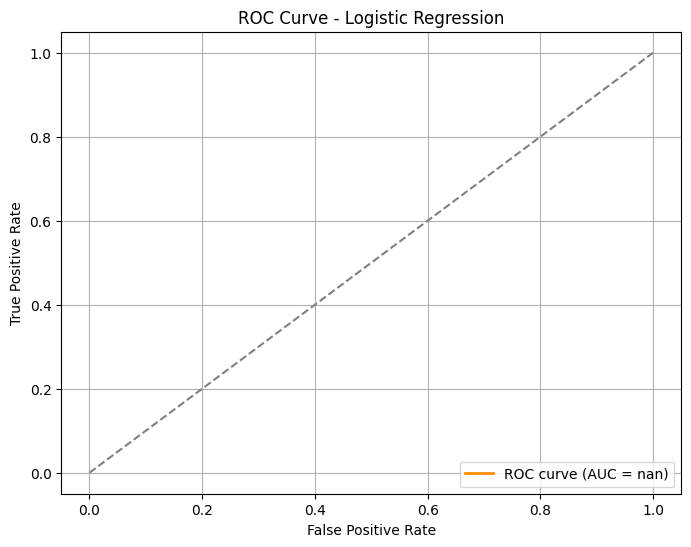

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Step 4: Compare with Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"Random Forest Accuracy:     {rf_acc:.2f}")

Logistic Regression Accuracy: 1.00
Random Forest Accuracy:     1.00


## Step 5: Random Forest Feature Importance

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.



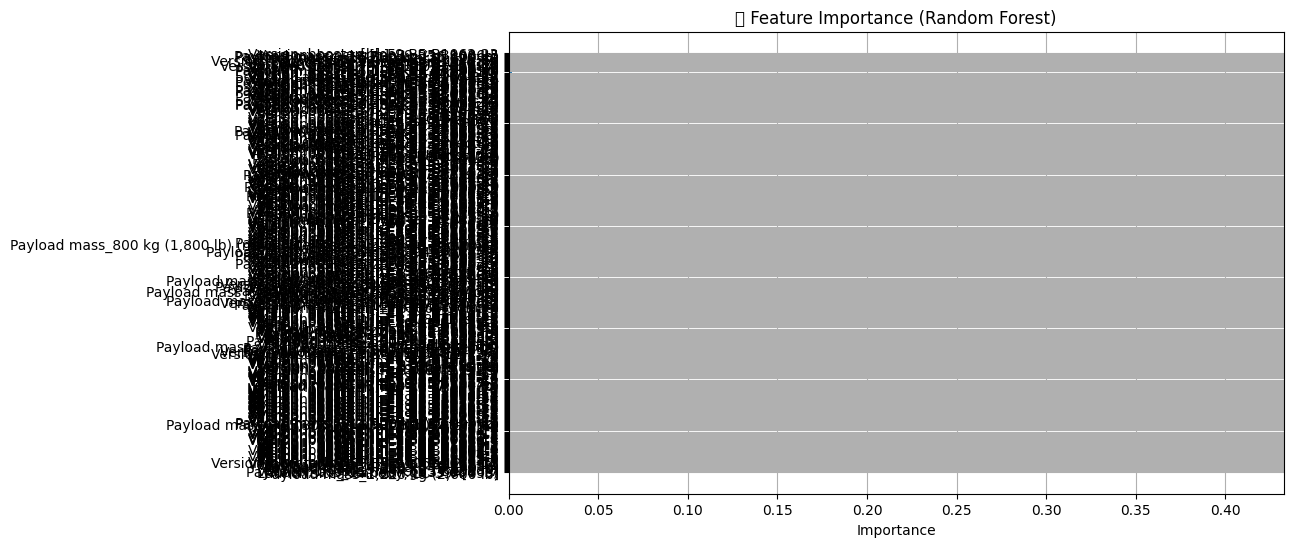

In [38]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df.sort_values("Importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"])
plt.gca().invert_yaxis()
plt.title("🌲 Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.grid()
plt.show()